<a href="https://colab.research.google.com/github/YunSeoHwan/DNN_Base/blob/main/CH03/ch3_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activate function**

## **Step function**

In [ ]:
import numpy as np

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

# **Neural Network**

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([])

## **Softmax**

In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x

    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))
print()

error_a = np.array([1010, 1000, 930])
print(softmax(error_a))

[0.01821127 0.24519181 0.73659691]

[nan nan nan]


<ipython-input-2-4ea527fb46ca>:2: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
<ipython-input-2-4ea527fb46ca>:4: RuntimeWarning: invalid value encountered in divide
  y = exp_x / sum_exp_x


In [ ]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x

    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))
print()

error_a = np.array([1010, 1000, 930])
print(softmax(error_a))

[0.01821127 0.24519181 0.73659691]

[9.99954602e-01 4.53978687e-05 1.80476945e-35]


# **MNIST**

## **MINST Show**

(60000, 784)
(60000,)
(10000, 784)
(10000, 784)
5
(784,)
(28, 28)


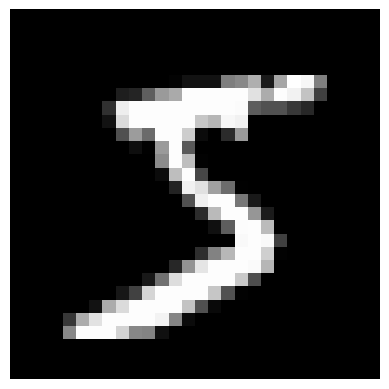

In [ ]:
import sys, os
import numpy as np
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DNN_base/dataset/mnist.py')
from mnist import load_mnist
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(x_test.shape)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

## **Forwork propagation**

In [ ]:
import pickle
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DNN_base/common/functions.py')
from functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/Colab Notebooks/DNN_base/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

acc = 0
for i in range(len(x)):
    y = predict(network, x[i])  # forword propagation
    p = np.argmax(y)    # 최대 확률값 도출
    if p == t[i]:
        acc += 1

print("Accuracy : " + str(float(acc) / len(x)))

Accuracy : 0.9352


# **Batch**

In [31]:
x, t = get_data()
network = init_network()

batch_size = 100
acc = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)  # 행 단위로 max 도출 -> 1x100 index return
    acc += np.sum(p == t[i:i + batch_size]) # bool 단위 비교 -> True만 1로 측정

print("Accuracy : " + str(float(acc) / len(x)))

Accuracy : 0.9352


In [32]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.argmax(x, axis=1)
print(y)

[2 2 2]
